# Fundamental Statistics Visualization on Pokemon

1. import pokemon.csv from input folder
2. import combats.csv from input folder
3. Run basic stats on the data set as instructed.

## Task 3: Explore the combats data and the pokemon data using data visualization tools

In [1]:
# Write code to show three rows of the combats head

In [2]:
#Choose any one from the top three combats (one row in combats). 
#Note that the participant records are numbers. 
#Are they in our pokemon.csv? If so, who are they?
#Write code to show names of the participants and the winer. 

In [34]:
import pandas as pd
combats = pd.read_csv('input/combats.csv')
pokemon = pd.read_csv('input/pokemon-merged.csv', index_col = 0) # contains pokemon_stats.csv

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2,Generation,Legendary
0,1,bulbasaur,45,49,49,65,65,45,grass,poison,1,False
1,2,ivysaur,60,62,63,80,80,60,grass,poison,1,False
2,3,venusaur,80,82,83,100,100,80,grass,poison,1,False
3,5,charmander,39,52,43,60,50,65,fire,NaN,1,False
4,6,charmeleon,58,64,58,80,65,80,fire,NaN,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
692,792,noivern,85,70,80,97,80,123,flying,dragon,6,False
693,793,xerneas,126,131,95,131,98,99,fairy,NaN,6,True
694,794,yveltal,126,131,95,131,98,99,dark,flying,6,True
695,796,diancie,50,100,150,100,150,50,rock,fairy,6,False


In [5]:
#Run the code below to update the combats dataframe
names_dict = dict(zip(pokemon['#'], pokemon['Name']))
cols = ["First_pokemon","Second_pokemon","Winner"]
combats_name = combats[cols].replace(names_dict)
a=combats["First_pokemon"].isin(pokemon["#"]) # get values in a series
b=combats["Second_pokemon"].isin(pokemon["#"])
# modify combats to contain same ids as pokemon
combats=combats[a & b] # merge series of boolean values (bitwise and)

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


In [69]:
#Run the following commands to see what they do. Refer to the pandas documentation if needed.
# pokemon.describe()
pokemon['Speed'].head()
#pokemon[["Speed", "Defense"]].head()
#pokemon.iloc[5:11]
#pokemon[pokemon["Generation"] > 5]
#pokemon["Speed"].max()
#pokemon.sort_values(by="HP", ascending=False).head(3)
#pokemon.sort_values(by="HP", ascending=False).iloc[5:10]
#pokemon.rename(columns={'#': 'id'}) #Note that the pokemon is not automatically updated by the result.

#del pokemon['sum'] #Do this if you have caluculated a sum column in your pokemon dataframe.

0    45
1    60
2    80
3    65
4    80
Name: Speed, dtype: int64

### Visualize Pokemon Status using Bokeh and the Grammar of Graphics

In [7]:
from IPython.display import display, Markdown
import pandas as pd
import bokeh


In [8]:
from bokeh.io import output_notebook
from bokeh.io import show
output_notebook ()

Loading BokehJS ...

In [9]:
from bokeh.plotting import figure

# Create a canvas with a specific set of tools for the user:
TOOLS = 'pan,box_zoom,wheel_zoom,lasso_select,save,reset,help'
p = figure(width=500, height=500, tools=TOOLS)
print(p)

Figure(id='1003', ...)


In [10]:
p.triangle(x=pokemon['Speed'], y=pokemon['Defense'])

GlyphRenderer(id='1041', ...)

In [11]:
show(p)

In [28]:
#Write code here to determine unique generations.

unique_gen = pokemon['Generation'].unique() 
print(unique_gen)

[1 2 3 4 5 6]


In [27]:
# Mape each generation with a unique color
from bokeh.palettes import brewer
color_map = dict(zip(unique_gen, brewer['Dark2'][len(unique_gen)]))
print(color_map)

{1: '#1b9e77', 2: '#d95f02', 3: '#7570b3', 4: '#e7298a', 5: '#66a61e', 6: '#e6ab02'}


In [30]:
#Create a data source for each generation 
data_sources = {}
for gen in unique_gen:
    data_sources[gen] = ColumnDataSource(pokemon[pokomon['Generation']==gen])

NameError: name 'ColumnDataSource' is not defined

In [31]:
p = figure()
for gen in unique_gen:
    p.triangle(source = data_source[gen], x=pokemon['Speed'], y=pokemon['Defense'], color = color_map[gen])
show(p)

NameError: name 'data_source' is not defined

Another handy static visualization tool is Seaborn. Check it out here: http://seaborn.pydata.org/tutorial/distributions.html

count    697.000000
mean     415.655667
std      108.569522
min      180.000000
25%      320.000000
50%      420.000000
75%      497.000000
max      720.000000
Name: status_sum, dtype: float64


C:\Users\AMP-Program\AppData\Local\Temp\ipykernel_2396\3860707845.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pokemon["status_sum"])


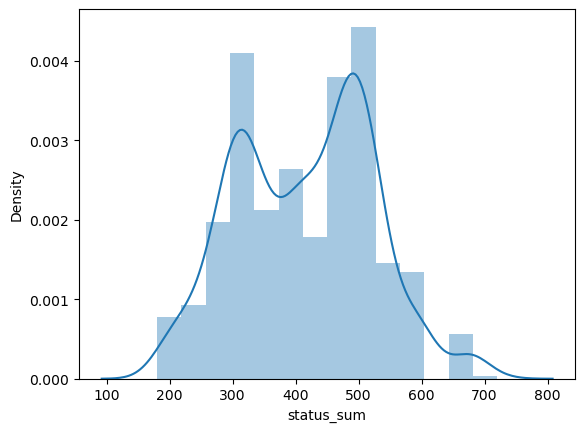

In [36]:
#Let's view the base status total distribution for all pokemons.
pokemon["status_sum"] = pokemon["HP"] + pokemon["Attack"] + pokemon["Defense"] + pokemon["Sp. Atk"] + pokemon["Sp. Def"] + pokemon["Speed"]
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print(pokemon["status_sum"].describe())
sns.distplot(pokemon["status_sum"])
plt.show()

This distribution histogram shows that base status sum's distribution has a bimodal distribution. First modal is around 300 and the other is around 500. 

count    38054.000000
mean       123.946497
std         91.812021
min          0.000000
25%         46.000000
50%        108.000000
75%        185.000000
max        525.000000
dtype: float64


C:\Users\AMP-Program\AppData\Local\Temp\ipykernel_2396\1395389036.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff_status_sum)


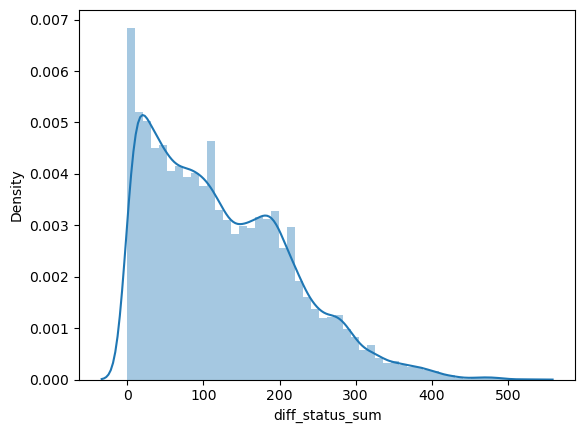

In [86]:
#Check the difference distribution of total base status in each combat
status_sum_dict = dict(zip(pokemon['#'], pokemon['status_sum']))
combats_status_sum = combats[cols].replace(status_sum_dict)
diff_status_sum = abs(combats_status_sum["First_pokemon"]-combats_status_sum["Second_pokemon"])
print(diff_status_sum.describe())
sns.distplot(diff_status_sum)
plt.xlabel("diff_status_sum")
plt.show()

Did pokemon with higher total base status score win a battle against pokemon with lower total base status score?

In [ ]:
#Write your code here to 
#1.calculate the difference between winner and loser's base status scores.
#2 Plot a distribution graph of the difference.


### Open question: can you find any patterns indicating correlations among the pokemon status columns? Write your code and statement of your analysis below.

In [89]:
combats_status_sum["Loser"] = combats_status_sum["First_pokemon"] + combats_status_sum["Second_pokemon"] - combats_status_sum["Winner"]

In [94]:
combats_status_sum

,First_pokemon,Second_pokemon,Winner,Loser
0,300,340,340,300
1,580,580,580,580
2,405,485,485,405
3,250,485,485,250
4,495,505,495,505
...,...,...,...,...
49994,319,350,350,319
49995,680,295,680,295
49996,328,275,328,275
49997,430,458,458,430


count    38054.000000
mean        68.776949
std        138.065898
min       -484.000000
25%        -23.000000
50%         69.000000
75%        170.000000
max        525.000000
dtype: float64


C:\Users\AMP-Program\AppData\Local\Temp\ipykernel_2396\4220455548.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(winner_diffs)


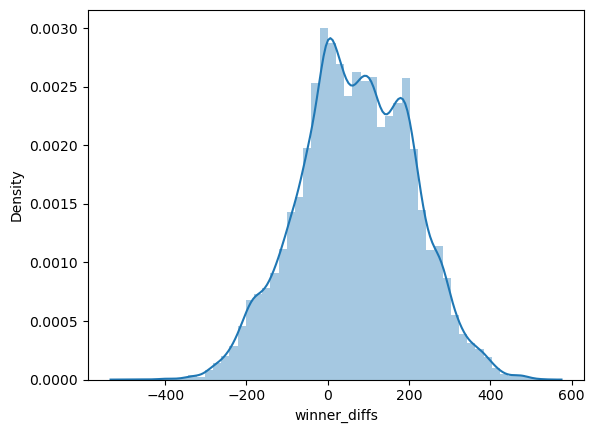

In [100]:
#Check the difference distribution of total base status in each combat
winner_diffs = combats_status_sum["Winner"]-combats_status_sum["Loser"]
print(winner_diffs.describe())
sns.distplot(winner_diffs)
plt.xlabel("winner_diffs")
plt.show()

In [103]:
combats["Loser"]

0        266
1        702
2        191
3        237
4        231
        ... 
49994    657
49995    126
49996    664
49997    303
49998     89
Name: Loser, Length: 38054, dtype: int64

In [106]:
pokemon["#"]
pokemon.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            687, 688, 689, 690, 691, 692, 693, 694, 695, 696],
           dtype='int64', length=697)